# <ins> INDVIDUAL PLANNING <ins>

### PART ONE: DESCRIBING THE DATASET

The PLAIcraft dataset was created by a computer science research group at UBC; their goal is to gain insight into the players they recruited for their ongoing project to better target future players. The dataset is split into two tables, one that keeps track of the players who have signed up along with the details they provided, and another that logs session times every time someone logs onto play. There are currently 197 players that are a part of the dataset, and 1536 different sessions recorded. 

The dataset originally includes the following variables:

- `hashedEmail:` An encrypted code that's attached to a user's email, this can be used to identify an individual player (Character Type)
- `name:` The player's name (Character Type)
- `gender:` The gender the player identifies with (Categorical Type)
- `age:`The player's age (Double Type)
- `experience:`The player's personal rating of their skill level in Minecraft (Categorical Type)
- `subscribe:`Whether the player agreed to receive update emails or not (Logical Type)
- `individualId:` The user's individual ID - this variable has no recorded values
- `organizationName:` The name of the player's affiliated organization - this variable has no recorded values
- `played_hours:` The total amount of hours the player has contributed (Double Type)
- `start_time:`The time the player started the session in DD/MM/YYYY HR:MIN format (Character Type)
- `end_time:`The time the player closed the session in DD/MM/YYYY HR:MIN format (Character Type)
- `original_start_time:` The time the player started the sessions in UNIX timestamp format (Double Type)
- `original_end_time:`The time the player closed the session in UNIX timestamp format (Double Type)

<ins>KEY NOTES:<ins>
1. UNIX timestamp format is a time format meant to be read by R, it is a measure of seconds starting from January 1st, 1970
2. The player information collected by the research group was obtained via the form they fill out when singing up to be a participant
3. Some of the variable types are off in the dataset, such as gender and experience being character instead of factors

### PART TWO: QUESTION AND WRANGLING PLAN

*Q: Can we predict the total amount of time a player will contribute to PLAIcraft based on their age and their experience level?* 

This question might seem simple as it resembles what we've worked with before but I've chosen it specifically for my own interests at the moment, I am open to tackling something completely different if my group wishes to. Answering this question could help the research team target the right audience in the future that maximizes their data.

<ins>WRANGLING OBJECTIVES<ins>
1. I won't need the session data most likely, but I noticed that it would be tidier if we could separate the date and the time the session occured into their own columns, so I will attempt that!
2. Experience is not numerical, therefore I can't calculate the distance right now for regression models (which I will need as I'm predicting a numerical value). The wrangling is not shown in this notebook as it is not necessary for the visualizations. 
3. The `individualId` and `organizationName` variables do not have any values recorded and so I will remove them from the data entirely as they'll serve no analytical purpose

Otherwise, there isn't much needed to be done in terms of wrangling!

### PART THREE: DATA WRANGLING AND VISUALIZATION

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
session_data <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")
head(session_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [3]:
tidy_sessions <- session_data |>
    separate(start_time, into = c("starting_date", "start_time"), sep = ' ')|>
    separate(end_time, into = c("ending_date", "end_time"), sep = ' ')
head(tidy_sessions)

# I used https://www.rdocumentation.org/packages/tidyr/versions/1.3.1/topics/separate this page to figure out the separate function
# I did not combine the dates column in case someone hosted a session past midnight and the end date change, making the two values different 
# Ideally, to make it easier to read, I would have combined the two

hashedEmail,starting_date,start_time,ending_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


In [4]:
player_data <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")|>
    select(experience:age)
head(player_data)

# I took a full look at the entire data, I'm using head() to keep the notebook tidy, since the data frame is entirely too large

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


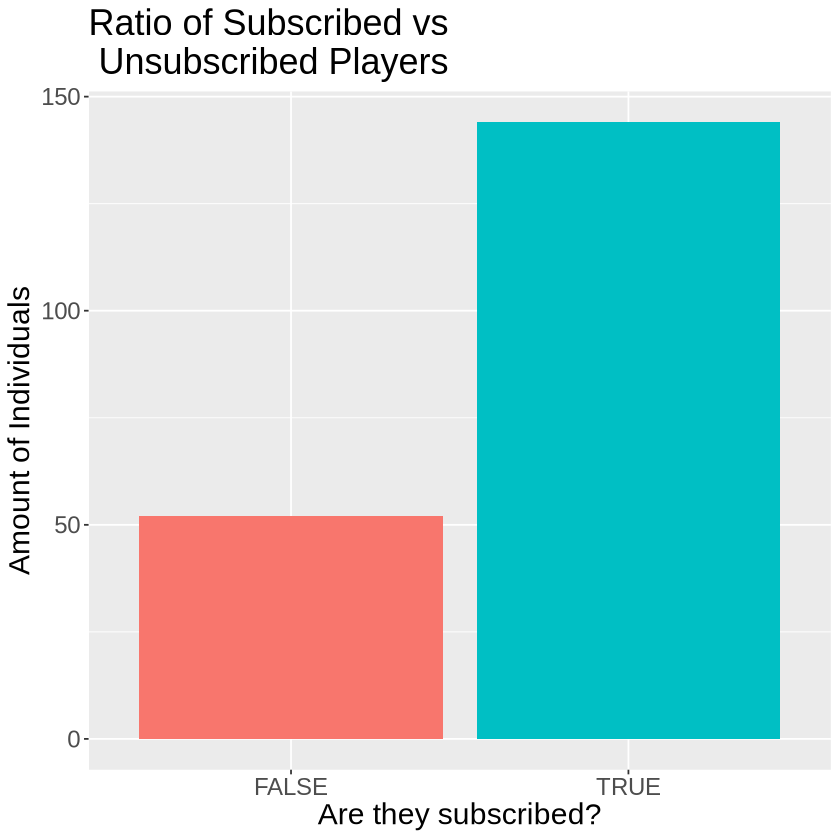

In [5]:
# Visual for the ratio of subscribed players
subscribed_bars <- player_data |>
    group_by(subscribe)|>
    summarize(number_of_people = n())|>
    ggplot(aes(x = subscribe, y = number_of_people, fill = subscribe))+
    geom_bar(stat = 'identity')+
    labs(y = "Amount of Individuals", x = "Are they subscribed?", title = 'Ratio of Subscribed vs \n Unsubscribed Players')+
    theme(legend.position = 'none')+
    theme(text = element_text(size = 18))
subscribed_bars

options(repr.plot.height = 5, repr.plot.width = 4)

# I expected the ratio to be more tied, or for people to opt out of e-mails. 
# This is purely for my own interest as I wondered how many people actually agreed to the e-mails like I did.

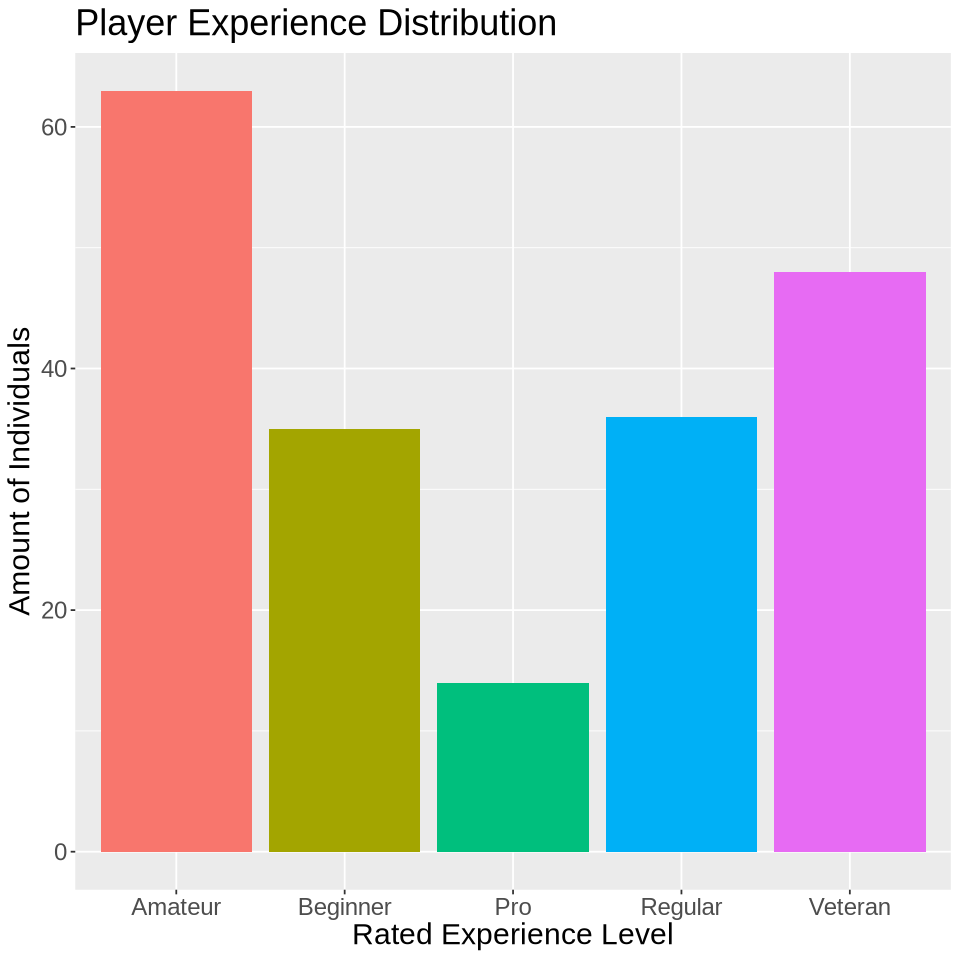

In [19]:
# Visual for the ratio of different experience levels
experience_lvls <- player_data |>
    group_by(experience)|>
    summarize(number_of_people = n())|>
    ggplot(aes(x = experience, y = number_of_people, fill = experience))+
    geom_bar(stat = 'identity')+
    labs(y = "Amount of Individuals", x = "Rated Experience Level", title = 'Player Experience Distribution')+
    theme(legend.position = 'none')+
    theme(text = element_text(size = 18))
experience_lvls

options(repr.plot.height = 8, repr.plot.width = 9)

# The plot shows us that the audience is quite diverse right now, you're either most likely to be an amateur or a veteran which opposite skill levels.
# If later on we find one of these demographics contributes more time, then it would let the research team know they should target that group more.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


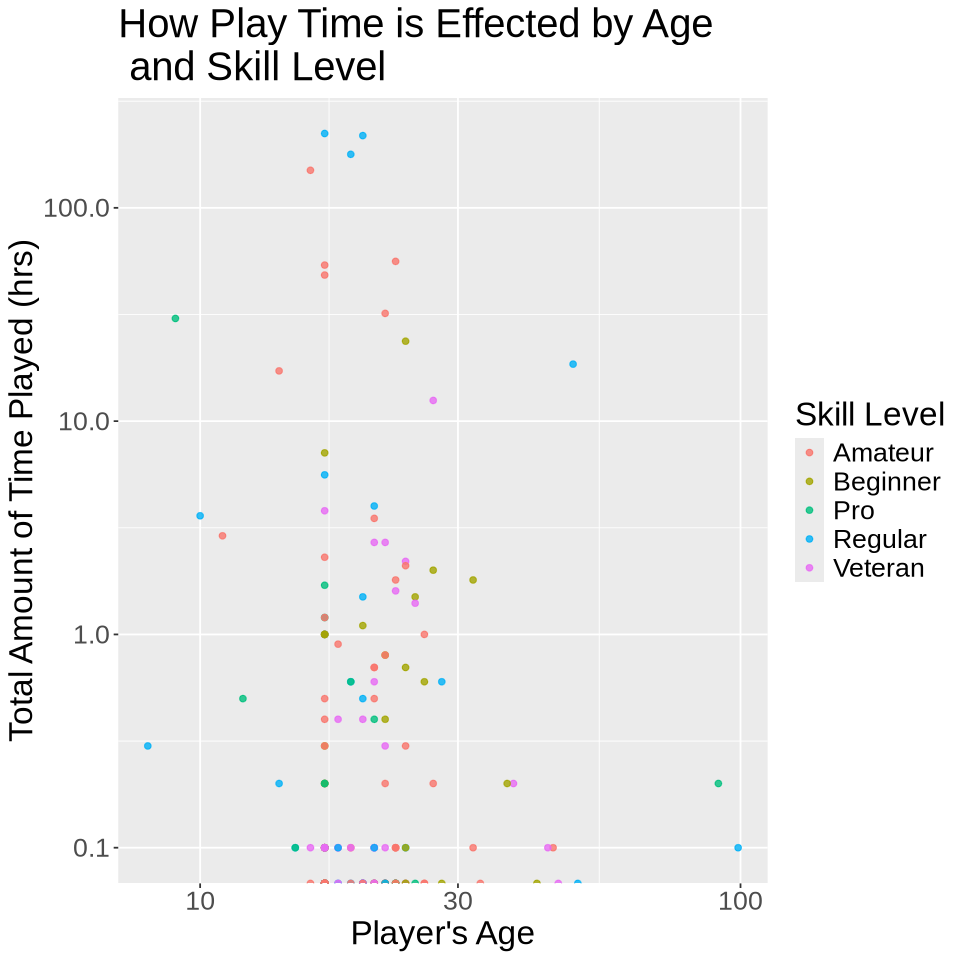

In [18]:
# Scatterplot to visualize the relationship between experience level, age, and time contributed
# My goal is to observe whether these trends are linear so that I may decide what predictive model to use. 

lvl_age_time <- player_data |>
    ggplot(aes(x = age, y = played_hours, color = experience))+
    geom_point(alpha = 0.8)+
    labs(x = "Player's Age", y = "Total Amount of Time Played (hrs)", 
         title = "How Play Time is Effected by Age \n and Skill Level", color = "Skill Level")+
    scale_y_log10()+
    scale_x_log10()+
    theme(text = element_text(size = 20))
lvl_age_time

options(repr.plot.height = 8, repr.plot.width = 8)

This graph has unfortunately revealed to me that the correlation between age and the total amount of data contributed is weak if not non-existent. The same goes for skill level. It's a bit frustrating to see this as it interferes with my question since we can't reliably use these variables as predictors if there is no relationship, however, it does tell me to explore more variables so I can adjust my question.

Even if there is no relationship though, we can gather from this that so far the people who *have* made big contributions are amateurs and regular players. This does not mean that someone else who is a regular or amateur player will make the same level of contributions, just that in this sample of players this is the case.

This also shows me there's no linear relationship so I will not use those predictive models.

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


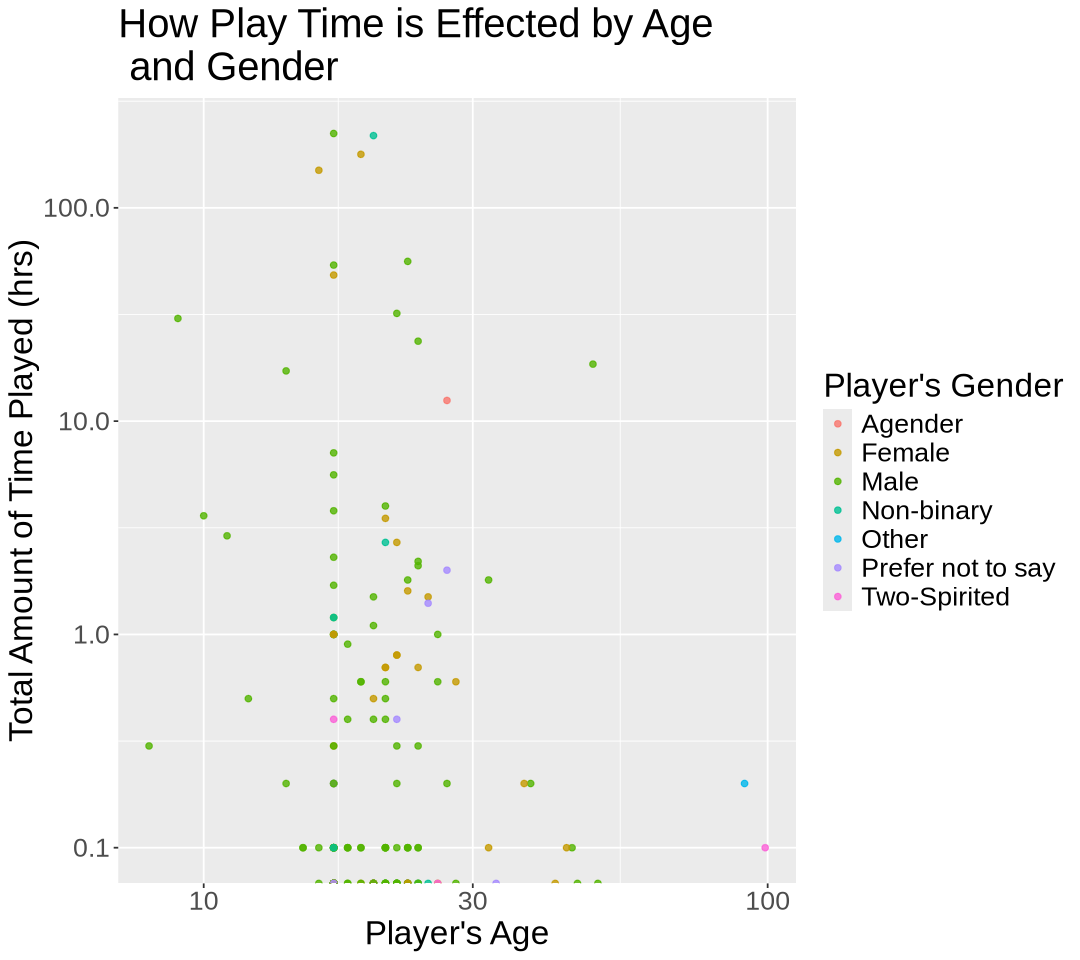

In [20]:
# I'm running the same plot now but with gender to see if there's any relationship here
gender_age_time <- player_data |>
    ggplot(aes(x = age, y = played_hours, color = gender))+
    geom_point(alpha = 0.8)+
    labs(x = "Player's Age", y = "Total Amount of Time Played (hrs)", 
         title = "How Play Time is Effected by Age \n and Gender", color = "Player's Gender")+
    scale_y_log10()+
    scale_x_log10()+
    theme(text = element_text(size = 20))
gender_age_time

options(repr.plot.height = 8, repr.plot.width = 8)

It seems like there's more players who identify as male in general so they'll make up for the most data collected. This could suggest that it is better to appeal to a male demographic, but it might also mean that in the original sample they simply did not try to market to the genders equally.

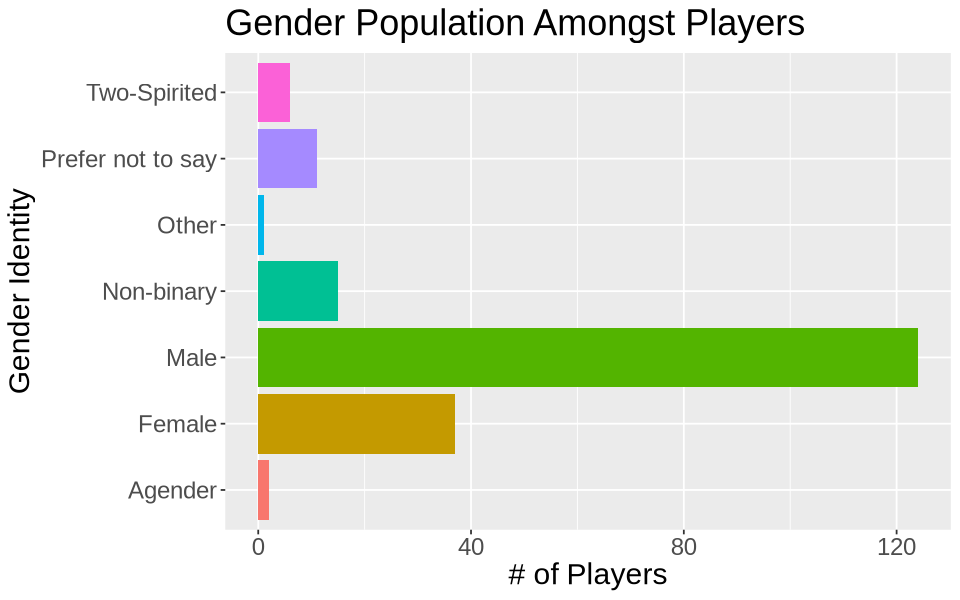

In [32]:
gender <- player_data |>
    group_by(gender)|>
    summarize(number_of_people = n())|>
    ggplot(aes(x = number_of_people, y = gender, fill = gender))+
    geom_bar(stat = 'identity')+
    labs(y = "Gender Identity", x = "# of Players", title = 'Gender Population Amongst Players')+
    theme(legend.position = 'none')+
    theme(text = element_text(size = 18))
gender

options(repr.plot.height = 5, repr.plot.width = 8)
# I ran this plot to double-check the ratio of males compared to other genders and I figured I was right in assuming gender plays a role just 
# because of the sheer amount of male players

### PART FOUR: METHODS AND PLAN

I believe choosing KNN-regression will be the best method for `predicting players' total play time based on multiple categorical values`. This is because linear models will not work with these relationships as shown in the EDA, where no linear relationship was present. I am choosing a regression method as my goal is to predict a numerical value (the time players spend on PLAIcraft), not a categorical one. The one disadvantage I will run into though is that KNN-regression's accuracy gets weaker when multiple predictors are included. This is because when creating more dimensions, the distance for the nearest neighbour becomes harder to compute properly. However, I feel like even with this disadvantage my choice is justified as through the process of elimination, this is the only model that's fit to predict my question. 

Notably, if I would like to have a KNN-regression model predict `played_hours` based on any categorical value, I will have to convert them to a numerical value instead of a factor so that a distance may be calculated. For example, the experience levels can instead be rated on a scale of 1-5 instead of "beginner", "amateur", etc.

When building my model I will first wrangle the data as a whole to ensure that all my variables are correct. This includes any additional wrangling I did not need to do for EDA but will need to do for KNN. Mainly, the only processing I need to do to properly address this question is to convert my categorical value.

For my data split, I will create a training and data set. I want to do a 75% split where 75% goes to the training and the remaining 25% to the testing. If there are more visualizations needed or more investigation needs to be done, I'll perform them on the training set. The split will be done after the initial wrangling and before I build my KNN model. Since I am using KNN I need to test for the best K value and therefore will perform a cross-validation using the standard five-fold method. I plan to test K values from 1-15 as it seems like the most reasonable proportion for a dataset of 197 different players. Anything more and I might capture noise due to the area being too big.